In [67]:
import pandas as pd
import matplotlib.pyplot as plt

imd band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

Chcemy zobaczyć który kurs jest najtrudniejszy, który najłatwiejszy, który najbardziej popularny

1) podzielić na moduły, sprawdzić ile osób powtarzało, ile osób miało ile kredytów, ile osób zdało, jaki był level edukacji – nadać każdemu levelowi numer, policzyć średnią itd.
2) Withdrown -> dropout
2) zobaczyć który kurs jak się klikał
4) w którym kursie były najtrudniejsze zadania – ile było zadań w każdym, jakie były wyniki
3) podzielić kliknięcia na osoby które zdały i nie, pokazać średnią, medianę i odchylenie std
1) zobaczyć korelację liczby kliknięć studenta w kursie i jego ocen za zadania

Można też zobaczyć czy kobiety są lepsze w tych kursach czy mężczyźni
1) zobaczyć ile osób zdaje
2) które kursy są popularniejsze dla każdej płci

In [68]:
students_df = pd.read_csv('data/studentInfo.csv')
clicks_df = pd.read_csv('data/studentVle.csv')
assesments = pd.read_csv('data/assessments.csv')
student_assesments = pd.read_csv('data/studentAssessment.csv')

students_df.head(3)
# clicks_df.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [64]:
students_df.value_counts("id_student")

id_student
584077     5
157310     4
565275     4
172965     4
624126     4
          ..
551938     1
551922     1
551906     1
551902     1
2716795    1
Length: 28785, dtype: int64

In [62]:
#code finalresult 
# students_df['final_result'].value_counts().plot(kind='bar')
student_clicks = clicks_df.groupby("id_student").sum()["sum_click"]
students_df = pd.merge(students_df, student_clicks, on="id_student")

students_df["final_result_coded"] = students_df["final_result"].map({"Pass": 1, "Fail": -1, "Distinction": 2, "Withdrawn": 0})
students_df.corr()["final_result_coded"].drop("id_student").sort_values()

/tmp/ipykernel_10465/3036706613.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_clicks = clicks_df.groupby("id_student").sum()["sum_click"]
/tmp/ipykernel_10465/3036706613.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students_df.corr()["final_result_coded"].drop("id_student").sort_values()


num_of_prev_attempts   -0.124351
studied_credits        -0.072336
sum_click               0.365557
final_result_coded      1.000000
Name: final_result_coded, dtype: float64

In [70]:
# add clicks for student by module

student_clicks = clicks_df.groupby(["id_student", "code_module"]).sum()["sum_click"]
students_df = pd.merge(students_df, student_clicks, on=["id_student", "code_module"])

# students_df[students_df.id_student == 584077]

students_df["final_result_coded"] = students_df["final_result"].map({"Pass": 1, "Fail": -1, "Distinction": 2, "Withdrawn": 0})
# students_df.corr()["final_result_coded"].drop("id_student").sort_values()

/tmp/ipykernel_10465/1806046740.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  student_clicks = clicks_df.groupby(["id_student", "code_module"]).sum()["sum_click"]


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click_x,sum_click_y
8346,CCC,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn,354,354
8347,CCC,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,90,N,Withdrawn,354,354
14007,DDD,2013J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn,343,343
14008,DDD,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,150,N,Withdrawn,343,343
14009,DDD,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,2,90,N,Withdrawn,343,343


In [43]:
modules_group = students_df.groupby("code_module")
modules_group.count()

,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
code_module,,,,,,,,,,,
AAA,748,748,748,748,748,725,748,748,748,748,748
BBB,7909,7909,7909,7909,7909,7846,7909,7909,7909,7909,7909
CCC,4434,4434,4434,4434,4434,4180,4434,4434,4434,4434,4434
DDD,6272,6272,6272,6272,6272,5992,6272,6272,6272,6272,6272
EEE,2934,2934,2934,2934,2934,2817,2934,2934,2934,2934,2934
FFF,7762,7762,7762,7762,7762,7395,7762,7762,7762,7762,7762
GGG,2534,2534,2534,2534,2534,2527,2534,2534,2534,2534,2534


/tmp/ipykernel_10465/678840988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clicks_df.groupby(['code_module', 'code_presentation']).sum()["sum_click"].plot(kind='bar')


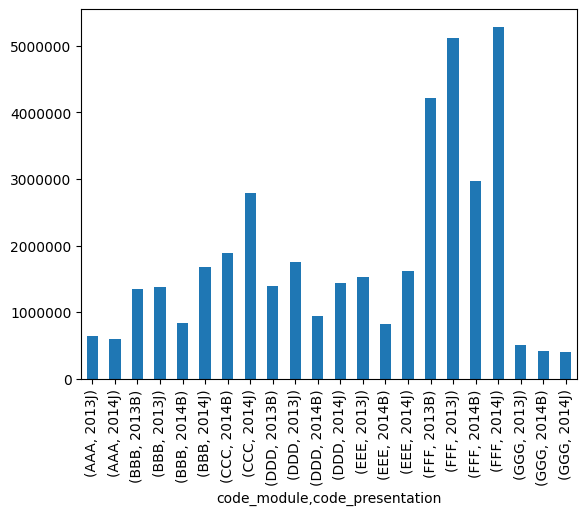

In [40]:

clicks_df.groupby(['code_module', 'code_presentation']).sum()["sum_click"].plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

<Axes: xlabel='date'>

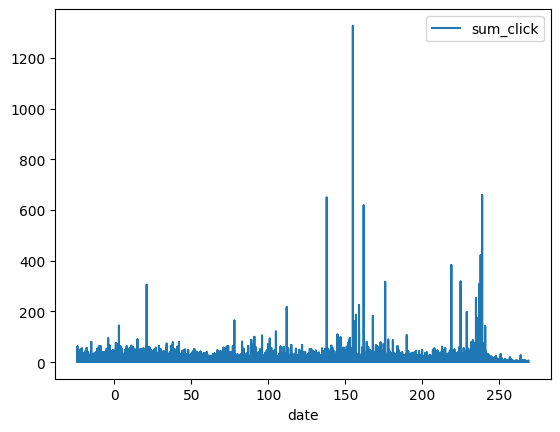

In [10]:
clicks_df[clicks_df["code_module"] == "AAA"].plot(x="date", y="sum_click")